# Shortest Path

Networkx tiene una implementación que encuentra el camino más corto entre dos puntos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import pickle

Se utilizará los datos de tiempo.

In [2]:
time_data = pd.read_csv('time_matrix.csv')

Matriz de adyacencia para generar el grafo.

In [3]:
time_matrix = time_data.iloc[:,1:].values

In [4]:
time_graph = nx.DiGraph(time_matrix)

La función devuelve el nombre de los nodos que forman parte del camino más corto.

In [5]:
nx.shortest_path(time_graph,15,11)

[15, 10, 14, 0, 29, 32, 2, 22, 11]

Para la demostración gráfica se necesita el modelo de osmnx.

In [8]:
with open('cluster_model.pickle', 'rb') as handle:
    graph = pickle.load(handle)

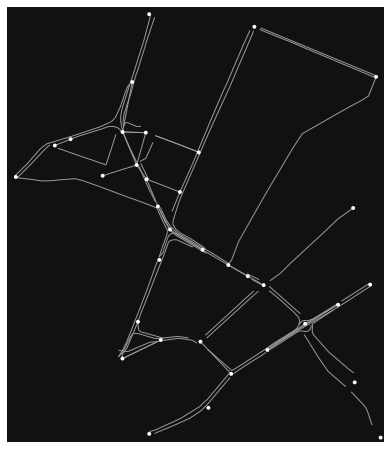

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [13]:
ox.plot_graph(graph)

Se puede cambiar el color de los nodos para poder visualizar el camino.

In [31]:
colors = ['b']*35

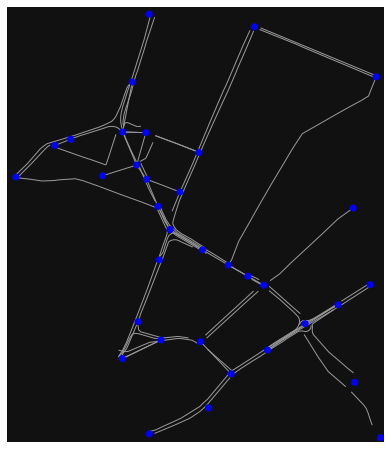

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [32]:
ox.plot_graph(graph,
            node_size=50,
            node_color = colors)

Los nodos del path se pueden cambiar de color, pero sigue siendo difícil ver el path.

In [208]:
def find_shortest_path(node1,node2):
    path = nx.shortest_path(time_graph,node1,node2)
    colors = ['b']*35
    for node in (path):
        colors[node] = 'y'
    colors[node1] = 'g'
    colors[node2] = 'r'
    ox.plot_graph(graph,
            node_size=50,
            node_color = colors)

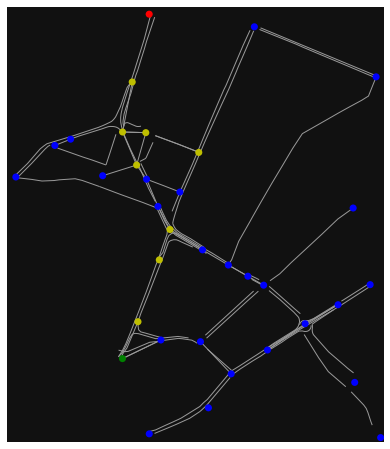

In [209]:
find_shortest_path(11,15)

La mejor opción es imprimir el mapa junto a un grafo dirigido para entender la dirección del movimiento.

In [35]:
path = nx.shortest_path(time_graph,11,15)

In [15]:
with open('coordenadas_centros.pickle', 'rb') as handle:
    pos = pickle.load(handle)

Se genera una lista de edges que servirán para pintar el path.

In [30]:
edges_route = []
for i in range(len(path)-1):
    edges_route.append((path[i],path[i+1]))
edges_route[:5]

[(11, 30), (30, 22), (22, 2), (2, 29), (29, 0)]

Se crean listas para el color y el grosor de las edges.

In [23]:
color_list = ['b'] * len(graph.edges)

In [24]:
width_list = [0.5] * len(graph.edges)

Por cada edge en el grafo, si es parte del path del camino más corto, entonces su color y grosor cambiarán.

In [27]:
for i,edge in enumerate(graph.edges):
    color_edge = (edge[0],edge[1])
    if color_edge in edges_route:
        color_list[i] = 'r'
        width_list[i] = 2

Se cambia el color de los nodos que sob parte del path.

In [33]:
colors = ['b']*35
for node in (path):
    colors[node] = 'r'

[11, 30, 22, 2, 29, 0, 16, 14, 10, 15]


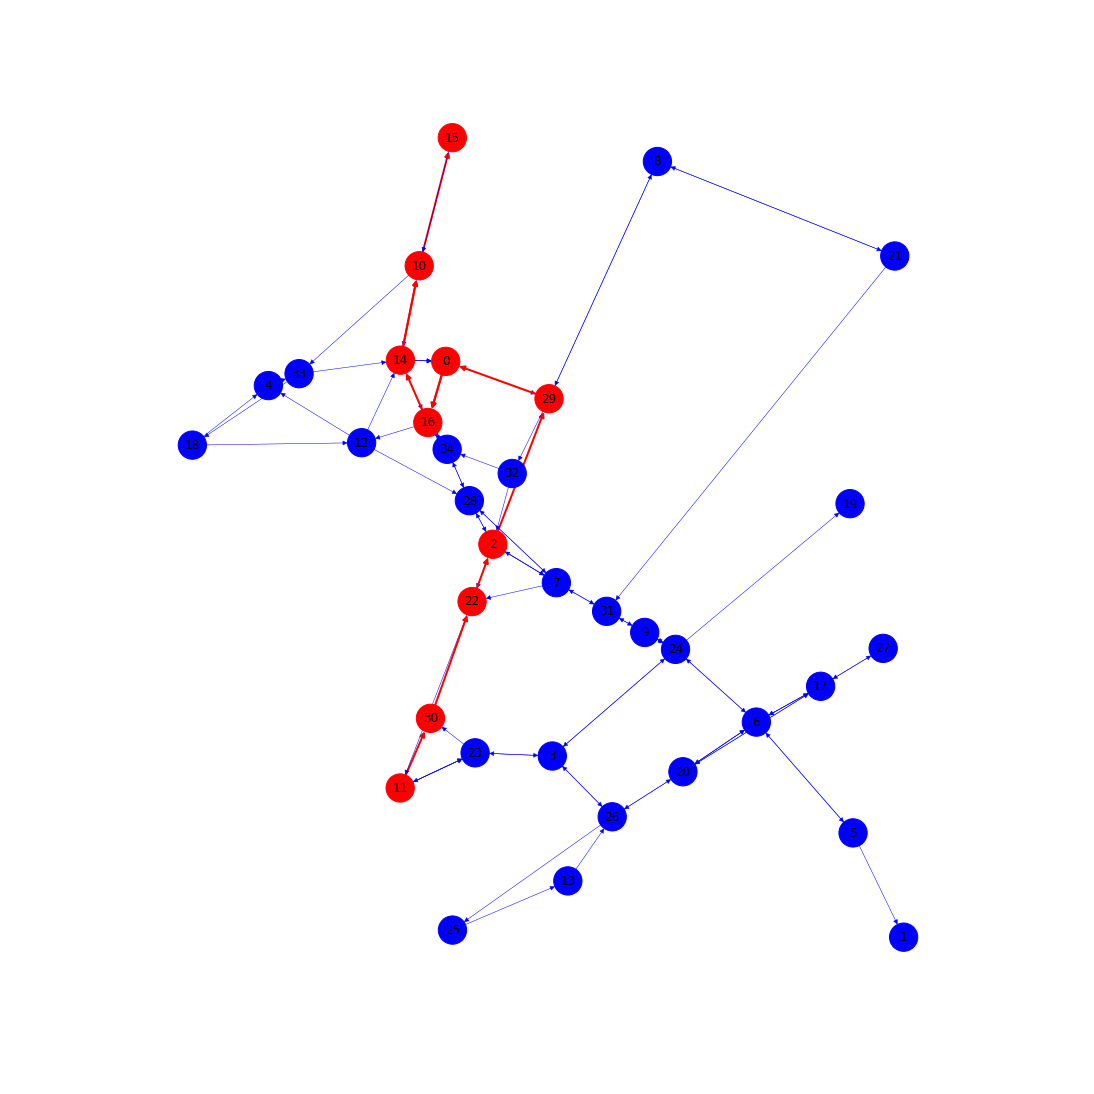

In [34]:
print(path)
plt.figure(figsize=(15,15))
nx.draw(graph,
        pos,
        node_size=800,
        with_labels = True,
        node_color = colors,
        edge_color = color_list,
        width=width_list)

## Función para realizar el proceso más rápidamente

In [45]:
def print_shortest_path(node1,node2,graph):
    #osmnx
    path = nx.shortest_path(time_graph,node1,node2)
    colors = ['b']*35
    for node in (path):
        colors[node] = 'r'
    colors[node2] = 'g'
    ox.plot_graph(graph,
            node_size=50,
            node_color = colors)   
    
    #networkx
    edges_route = []
    for i in range(len(path)-1):
        edges_route.append((path[i],path[i+1]))
    color_list = ['b'] * len(graph.edges)
    width_list = [0.5] * len(graph.edges)
    for i,edge in enumerate(graph.edges):
        color_edge = (edge[0],edge[1])
        if color_edge in edges_route:
            color_list[i] = 'r'
            width_list[i] = 2    
    print(path)
    plt.figure(figsize=(15,15))
    nx.draw(graph,
            pos,
            node_size=800,
            with_labels = True,
            node_color = colors,
            edge_color = color_list,
            width=width_list)    

Demostración de la función.

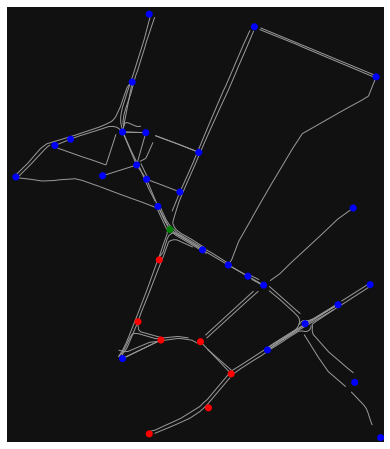

[25, 13, 26, 3, 23, 30, 22, 2]


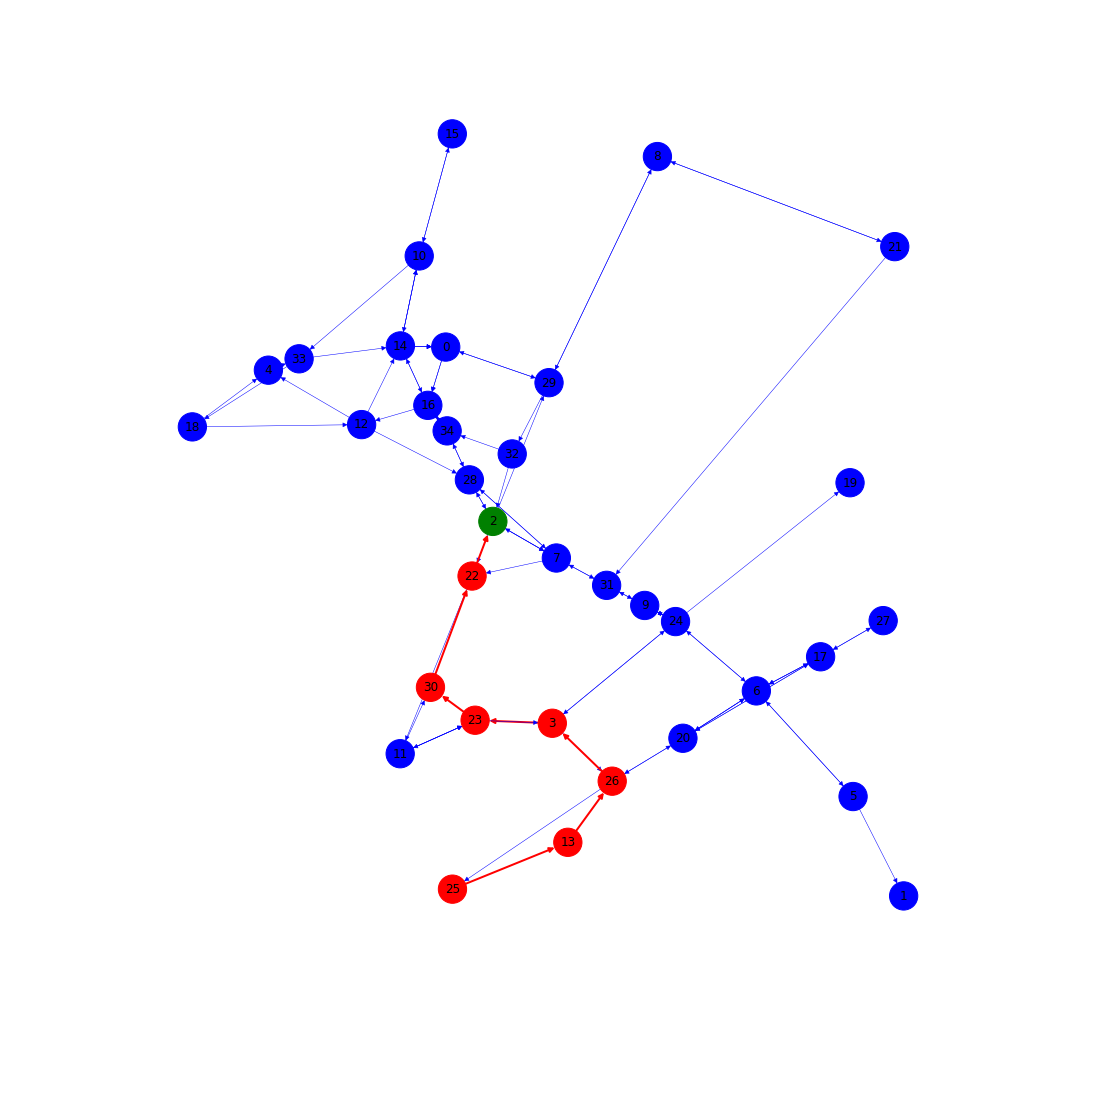

In [46]:
print_shortest_path(25,2,graph)

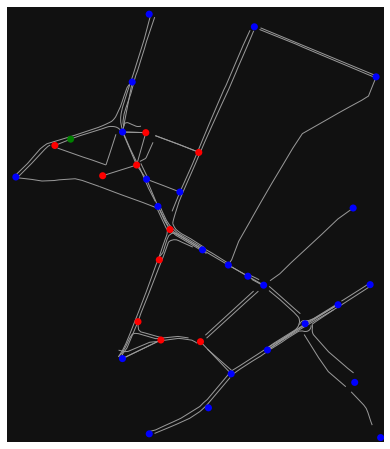

[3, 23, 30, 22, 2, 29, 0, 16, 12, 4, 33]


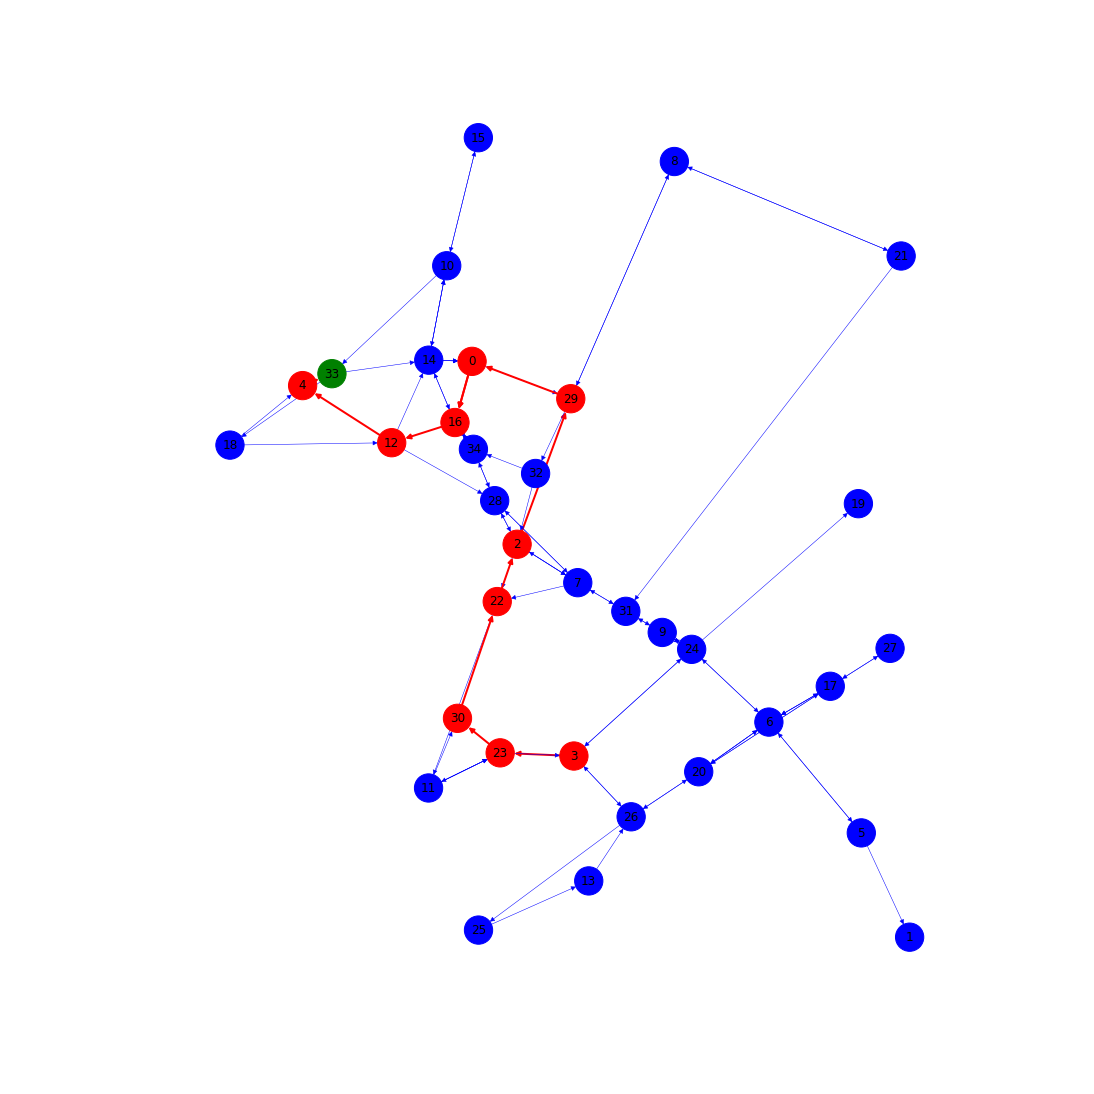

In [47]:
print_shortest_path(3,33,graph)

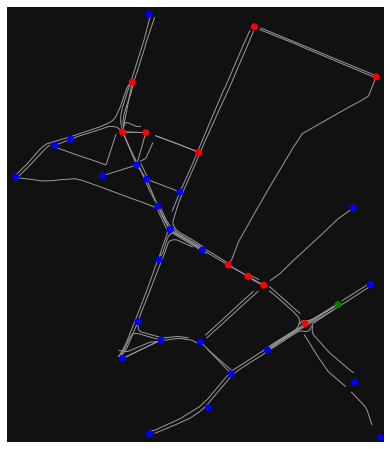

[10, 14, 0, 29, 8, 21, 31, 9, 24, 6, 17]


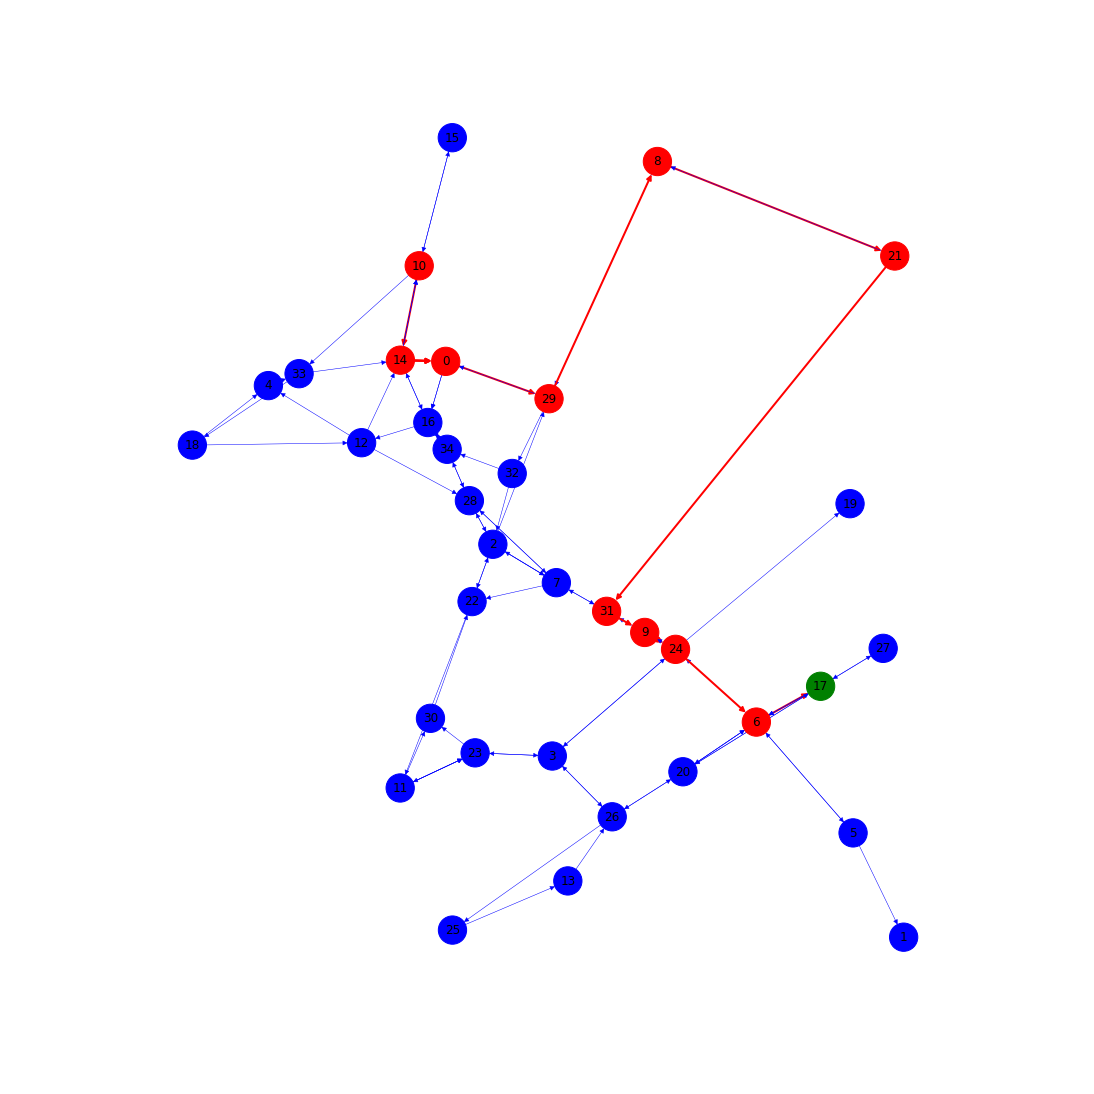

In [48]:
print_shortest_path(10,17,graph)